[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?

## 목표
* 특정 업종/테마의 모든 종목에 대한 상세 정보를 수집

## 실습과정
1) 종목/테마 정보를 하나 고릅니다.  
2) 해당 종목/테마의 종목 목록을 수집합니다. (read_html, dropna)  
3) 개별 종목의 상세 정보를 수집합니다. (read_html, concat, set_index, transpose)  
4) 2번에서 수집한 모든 종목의 상세정보를 수집합니다. (함수, tqdm, apply, concat)  
5) 2번에서 수집한 목록에 상세 정보를 합쳐줍니다. (merge)  
6) csv 파일로 저장하고 불러옵니다.



## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()
font_family

'Malgun Gothic'

In [4]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
# 그래프 스타일 설정
plt.style.use("seaborn")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글'}>

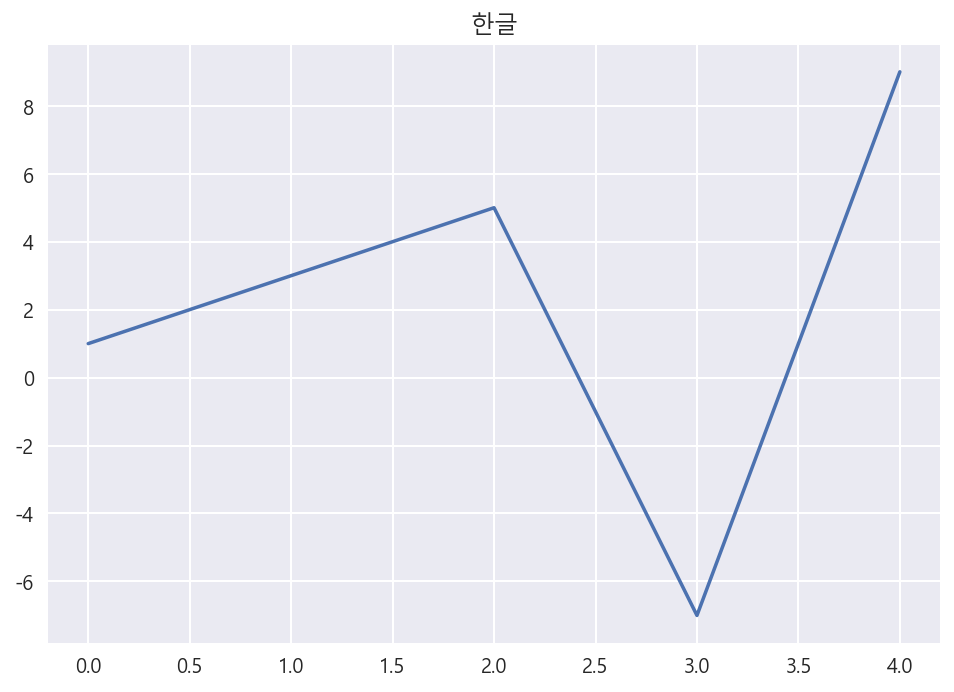

In [6]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1,3,5,-7,9]).plot(title="한글")

### 제약업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [7]:
# 수집할 업종/테마주소
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261"
url
# 2차전지
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"

'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261'

In [8]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
table

[   업종명    전일대비 전일대비 등락현황                   등락그래프
    업종명    전일대비        전체    상승    보합    하락 등락그래프
 0   제약  +0.60%     152.0  61.0  19.0  72.0   12%
 1  NaN     NaN       NaN   NaN   NaN   NaN   NaN
 2  NaN     NaN       NaN   NaN   NaN   NaN   NaN,
      0      1          2        3          4       5
 0  거래량   매수호가   거래대금(백만)  시가총액(억)    영업이익(억)  PER(배)
 1   시가   매도호가      전일거래량  자산총계(억)    영업이익증가율  ROE(%)
 2   고가  매수총잔량      외국인비율  부채총계(억)   당기순이익(억)  ROA(%)
 3   저가  매도총잔량  상장주식수(천주)   매출액(억)   주당순이익(원)  PBR(배)
 4  NaN    NaN        NaN   매출액증가율  보통주배당금(원)  유보율(%),
            종목명      현재가     전일비      등락률     매수호가     매도호가         거래량  \
 0          NaN      NaN     NaN      NaN      NaN      NaN         NaN   
 1     씨케이에이치 *    295.0    48.0  +19.43%    295.0    298.0  46102101.0   
 2     차백신연구소 *  13000.0  1300.0  +11.11%  12950.0  13000.0  46613595.0   
 3       바이젠셀 *  37300.0  3150.0   +9.22%  37200.0  37300.0    802803.0   
 4        큐라클 *  41800.0  2800.0   +7.18%  41800.

In [9]:
len(table)

3

In [10]:
table[2]

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,씨케이에이치 *,295.0,48.0,+19.43%,295.0,298.0,46102101.0,13799.0,3693091.0,NaN,NaN,NaN
2,차백신연구소 *,13000.0,1300.0,+11.11%,12950.0,13000.0,46613595.0,631339.0,0.0,NaN,NaN,NaN
3,바이젠셀 *,37300.0,3150.0,+9.22%,37200.0,37300.0,802803.0,30160.0,65332.0,NaN,NaN,NaN
4,큐라클 *,41800.0,2800.0,+7.18%,41800.0,41850.0,825924.0,34217.0,292677.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
150,국전약품 *,14200.0,800.0,-5.33%,14150.0,14200.0,2792954.0,40219.0,3529798.0,NaN,NaN,NaN
151,엔지켐생명과학 *,71300.0,7600.0,-9.63%,71200.0,71300.0,348979.0,25606.0,229921.0,NaN,NaN,NaN
152,삼아제약 *,23000.0,2650.0,-10.33%,23000.0,23100.0,410590.0,9564.0,208427.0,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2]
print("변경전: ", raw.shape)
raw = raw.dropna(how='all').dropna(how='all', axis=1)
print("변경후: ", raw.shape)

변경전:  (155, 12)
변경후:  (152, 9)


3개의 row, 3개의 column이 제거되었습니다.

## 파생변수 만들기

In [12]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y%m%d")
today

'20211023'

In [13]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today

In [14]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,씨케이에이치 *,295.0,48.0,+19.43%,295.0,298.0,46102101.0,13799.0,3693091.0,20211023
2,차백신연구소 *,13000.0,1300.0,+11.11%,12950.0,13000.0,46613595.0,631339.0,0.0,20211023
3,바이젠셀 *,37300.0,3150.0,+9.22%,37200.0,37300.0,802803.0,30160.0,65332.0,20211023
4,큐라클 *,41800.0,2800.0,+7.18%,41800.0,41850.0,825924.0,34217.0,292677.0,20211023
5,네오이뮨텍(Reg.S) *,10800.0,550.0,+5.37%,10750.0,10800.0,2575633.0,27345.0,3052123.0,20211023


## 거래량과 거래대금 시각화

<AxesSubplot:ylabel='종목명'>

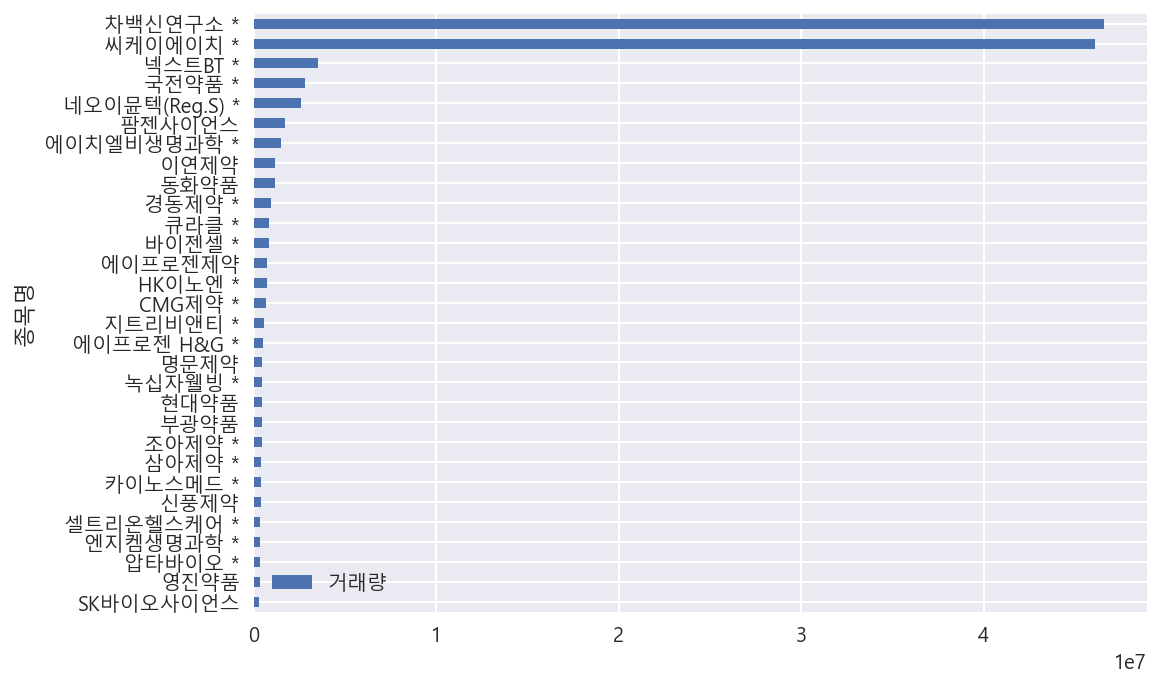

In [15]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에 
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
temp = raw[["종목명", "거래량"]].sort_values("거래량")
temp.set_index("종목명").tail(30).plot.barh()

<AxesSubplot:ylabel='종목명'>

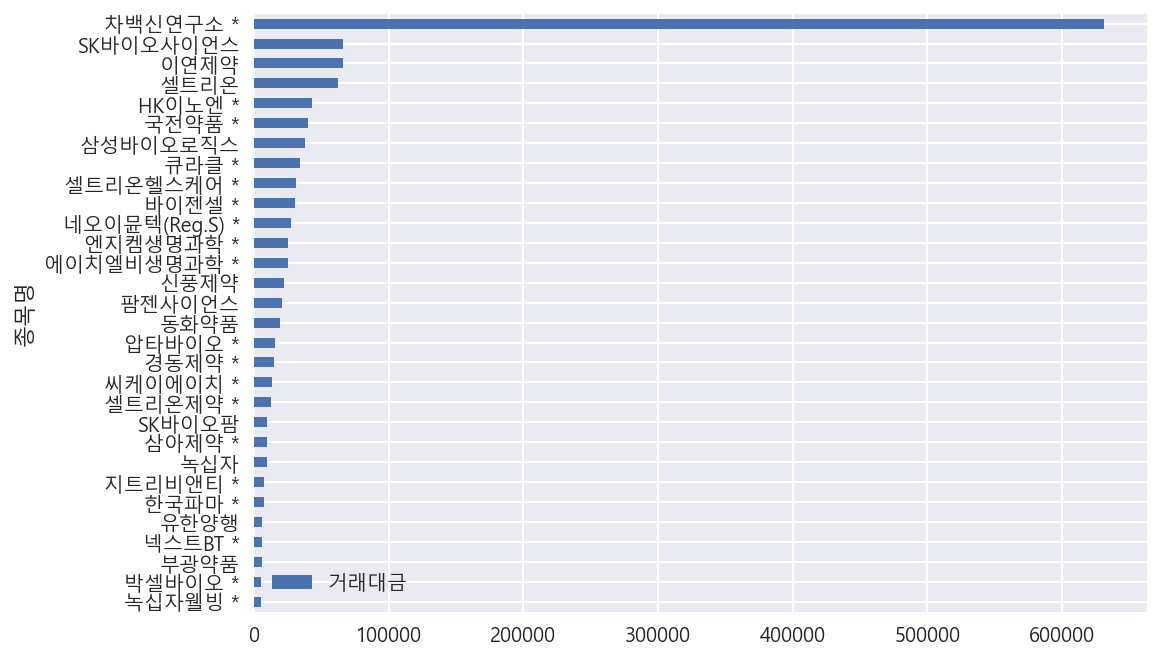

In [16]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[["종목명", "거래대금"]].sort_values("거래대금")
temp.set_index("종목명").tail(30).plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [17]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip() # 앞뒤 공백이 있으면 제거하기

<ipython-input-17-e4a9a60516c0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")


In [18]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[["종목명", "종목명_전처리"]].head(10)

,종목명,종목명_전처리
1,씨케이에이치 *,씨케이에이치
2,차백신연구소 *,차백신연구소
3,바이젠셀 *,바이젠셀
4,큐라클 *,큐라클
5,네오이뮨텍(Reg.S) *,네오이뮨텍(Reg.S)
6,카이노스메드 *,카이노스메드
7,진양제약 *,진양제약
8,현대약품,현대약품
9,드림씨아이에스 *,드림씨아이에스
10,일양약품우,일양약품우


In [19]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.

import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [20]:
df_krx[["Symbol", "Name"]]

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템
...,...,...
6980,000547,흥국화재2우B
6981,000545,흥국화재우
6982,003280,흥아해운
6983,037440,희림


In [21]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[["Symbol", "Name"]]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [22]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(152, 11)

In [23]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
df = raw.merge(df_item_code_name, left_on="종목명_전처리", right_on="종목명_전처리")  # merge하려는 데이터 프레임의 공통 key값이 있으면 자동으로 merge를 해줌
df.shape
# raw.merge(df_item_code_name, on="종목명_전처리", how='left')

(152, 12)

In [24]:
# 병합이 잘 되었는지 확인합니다.
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,씨케이에이치 *,295.0,48.0,+19.43%,295.0,298.0,46102101.0,13799.0,3693091.0,20211023,씨케이에이치,900120
1,차백신연구소 *,13000.0,1300.0,+11.11%,12950.0,13000.0,46613595.0,631339.0,0.0,20211023,차백신연구소,261780
2,바이젠셀 *,37300.0,3150.0,+9.22%,37200.0,37300.0,802803.0,30160.0,65332.0,20211023,바이젠셀,308080
3,큐라클 *,41800.0,2800.0,+7.18%,41800.0,41850.0,825924.0,34217.0,292677.0,20211023,큐라클,365270
4,네오이뮨텍(Reg.S) *,10800.0,550.0,+5.37%,10750.0,10800.0,2575633.0,27345.0,3052123.0,20211023,네오이뮨텍(Reg.S),950220


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [25]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "068270"
item_name = "셀트리온"

In [26]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.naver?code={item_code}"
item_url

'https://finance.naver.com/item/main.naver?code=068270'

In [27]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [28]:
tables[3].iloc[:, [0, -1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2021.09(E)
,주요재무정보,IFRS연결
0,매출액,4860.00
1,영업이익,1968.00
2,당기순이익,1627.00
3,영업이익률,40.50
4,순이익률,33.48
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [29]:
# 제대로 수집이 되었는지 확인합니다.
tables[5]

,0,1
0,시가총액,"30조 2,767 억원"
1,시가총액순위,코스피 11위
2,상장주식수,137934716
3,액면가l매매단위,"1,000원 l 1주"


In [30]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([tables[6], tables[7], tables[8], tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.06),추정PERlEPS,PBRlBPS (2021.06),배당수익률,동일업종 PER,동일업종 등락률
1,137934716,28671558,20.79%,"4.00매수 l 327,143","396,239 l 211,500","51.47배 l 4,265원","47.00배 l 4,689원","8.20배 l 26,773원",NaN,89.92배,+0.60%


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [31]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [32]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = tables[3].iloc[:, [0, -1]]
finance_info.columns = [0, 1]
item_info.append(finance_info)

In [33]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0        1
 0         매출액  4860.00
 1        영업이익  1968.00
 2       당기순이익  1627.00
 3       영업이익률    40.50
 4        순이익률    33.48
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)   874.00
 10     PER(배)   251.15
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN]

In [34]:
pd.concat([finance_info, tables[6], tables[7], tables[8], tables[9]]).set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.06),추정PERlEPS,PBRlBPS (2021.06),배당수익률,동일업종 PER,동일업종 등락률
1,4860.0,1968.0,1627.0,40.5,33.48,NaN,NaN,NaN,NaN,874.0,...,28671558,20.79%,"4.00매수 l 327,143","396,239 l 211,500","51.47배 l 4,265원","47.00배 l 4,689원","8.20배 l 26,773원",NaN,89.92배,+0.60%


In [35]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in tables:
    print(t.shape)

(2, 3)
(7, 4)
(8, 5)
(16, 11)
(14, 6)
(4, 2)
(3, 2)
(2, 2)
(4, 2)
(2, 2)
(24, 3)
(11, 3)
(11, 3)


In [36]:
for t in tables:
    if t.shape[1] == 2:
        item_info.append(t)

In [37]:
item_info

[            0        1
 0         매출액  4860.00
 1        영업이익  1968.00
 2       당기순이익  1627.00
 3       영업이익률    40.50
 4        순이익률    33.48
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)   874.00
 10     PER(배)   251.15
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN,
           0               1
 0      시가총액  30조  2,767  억원
 1    시가총액순위         코스피 11위
 2     상장주식수       137934716
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  137934716
 1  외국인보유주식수(B)   28671558
 2  외국인소진율(B/A)     20.79%,
            0                    1
 0  투자의견l목표주가   4.00매수  l  327,143
 1   52주최고l최저  396,239  l  211,500,
                    0                  1
 0   PERlEPS(2021.06)  51.47배  l  4,265원
 1          추정PERlEPS  47.00배  l  4,689원
 2  PBRlBPS (2021.06)  8.20배  l  26,773원
 3              배당수익률                NaN,
           0       1
 0 

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [38]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[0]

,0,1
0,매출액,4860.00
1,영업이익,1968.00
2,당기순이익,1627.00
3,영업이익률,40.50
4,순이익률,33.48
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),874.00


In [39]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,4860.0
1,영업이익,1968.0
2,당기순이익,1627.0
3,영업이익률,40.5
4,순이익률,33.48
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),874.0


## transpose를 통해 행과 열의 위치를 변경

In [40]:
df_item.T

,0,1,2,3,4,5,6,7,8,9,...,1,2,0,1,0,1,2,3,0,1
0,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.06),추정PERlEPS,PBRlBPS (2021.06),배당수익률,동일업종 PER,동일업종 등락률
1,4860.0,1968.0,1627.0,40.5,33.48,NaN,NaN,NaN,NaN,874.0,...,28671558,20.79%,"4.00매수 l 327,143","396,239 l 211,500","51.47배 l 4,265원","47.00배 l 4,689원","8.20배 l 26,773원",NaN,89.92배,+0.60%


In [41]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T # 인덱스를 지정해준 다음 transpose를 통해 행/열 위치를 변경

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.06),추정PERlEPS,PBRlBPS (2021.06),배당수익률,동일업종 PER,동일업종 등락률
1,4860.0,1968.0,1627.0,40.5,33.48,NaN,NaN,NaN,NaN,874.0,...,28671558,20.79%,"4.00매수 l 327,143","396,239 l 211,500","51.47배 l 4,265원","47.00배 l 4,689원","8.20배 l 26,773원",NaN,89.92배,+0.60%


## 개별 주가 정보를 수집하는 함수를 생성

In [42]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):
    
    item_url = f"https://finance.naver.com/item/main.naver?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    
    item_info = []
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)
    
    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)
    
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    
    time.sleep(0.1)  # 0.1초씩 간격을 두고 데이터를 불러온다.
    
    return df_item

In [43]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.06),추정PERlEPS,PBRlBPS (2021.06),배당수익률,동일업종 PER,동일업종 등락률
1,4860.0,1968.0,1627.0,40.5,33.48,NaN,NaN,NaN,NaN,874.0,...,28671558,20.79%,"4.00매수 l 327,143","396,239 l 211,500","51.47배 l 4,265원","47.00배 l 4,689원","8.20배 l 26,773원",NaN,89.92배,+0.60%


셀트리온에 대한 정보를 수집해옴

In [44]:
# 셀트리온헬스케어 종목정보 수집
item_code="091990"
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.06),추정PERlEPS,PBRlBPS (2021.06),배당수익률,동일업종 PER,동일업종 등락률
1,4875.0,1032.0,649.0,21.17,13.31,NaN,NaN,NaN,NaN,579.0,...,26823530,17.30%,"4.00매수 l 134,857","177,100 l 79,827","64.03배 l 1,376원","53.00배 l 1,660원","6.72배 l 13,116원",NaN,89.92배,+0.60%


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [45]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

In [46]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/152 [00:00<?, ?it/s]

In [47]:
result

0      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
2      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
                             ...                        
147    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
148    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
149    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
150    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
151    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 152, dtype: object

In [48]:
result[20]

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.06),추정PERlEPS,PBRlBPS (2021.06),배당수익률,동일업종 PER,동일업종 등락률
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,514766,1.59%,N/A l N/A,"10,850 l 6,100",N/A l -184원,N/A l N/A,"0.85배 l 8,032원",NaN,89.92배,+0.60%


## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [49]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.tolist())
df_item_info

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,동일업종 PER,동일업종 등락률,PERlEPS(2020.12),PBRlBPS (2020.12),PERlEPS(2021.06),PBRlBPS (2021.06),배당수익률l2020.12,PERlEPS(2021.08),PBRlBPS (2021.08),배당수익률l2020.11
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.92배,+0.60%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.92배,+0.60%,N/A l N/A,N/A l N/A,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.92배,+0.60%,"N/A l -1,385원","16.01배 l 2,330원",NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.92배,+0.60%,"N/A l -2,624원",49.64배 l 842원,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.92배,+0.60%,NaN,NaN,N/A l -488원,"6.03배 l 1,792원",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.92배,+0.60%,NaN,NaN,"N/A l -4,212원","6.80배 l 2,611원",NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.92배,+0.60%,NaN,NaN,N/A l -667원,"4.52배 l 3,074원",NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.92배,+0.60%,N/A l -80원,"8.55배 l 1,660원",NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.92배,+0.60%,NaN,NaN,"N/A l -2,754원","6.97배 l 10,224원",NaN,NaN,NaN,NaN


종목코드가 없기 때문에 기존의 데이터프레임과 merge를 할 수가 없음

In [51]:
df_item_info = df_item_info.reset_index()
df_item_info['종목코드'] = df["종목코드"]
del df_item_info["index"]

In [56]:
print(df_item_info.shape)
df_item_info.head()

(152, 41)


,level_0,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,...,동일업종 등락률,PERlEPS(2020.12),PBRlBPS (2020.12),PERlEPS(2021.06),PBRlBPS (2021.06),배당수익률l2020.12,PERlEPS(2021.08),PBRlBPS (2021.08),배당수익률l2020.11,종목코드
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+0.60%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900120
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+0.60%,N/A l N/A,N/A l N/A,NaN,NaN,NaN,NaN,NaN,NaN,261780
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+0.60%,"N/A l -1,385원","16.01배 l 2,330원",NaN,NaN,NaN,NaN,NaN,NaN,308080
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+0.60%,"N/A l -2,624원",49.64배 l 842원,NaN,NaN,NaN,NaN,NaN,NaN,365270
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+0.60%,NaN,NaN,N/A l -488원,"6.03배 l 1,792원",NaN,NaN,NaN,NaN,950220


In [55]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
print(df.shape)
df.head()

(152, 12)


,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,씨케이에이치 *,295.0,48.0,+19.43%,295.0,298.0,46102101.0,13799.0,3693091.0,20211023,씨케이에이치,900120
1,차백신연구소 *,13000.0,1300.0,+11.11%,12950.0,13000.0,46613595.0,631339.0,0.0,20211023,차백신연구소,261780
2,바이젠셀 *,37300.0,3150.0,+9.22%,37200.0,37300.0,802803.0,30160.0,65332.0,20211023,바이젠셀,308080
3,큐라클 *,41800.0,2800.0,+7.18%,41800.0,41850.0,825924.0,34217.0,292677.0,20211023,큐라클,365270
4,네오이뮨텍(Reg.S) *,10800.0,550.0,+5.37%,10750.0,10800.0,2575633.0,27345.0,3052123.0,20211023,네오이뮨텍(Reg.S),950220


## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [57]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
df_info = df.merge(df_item_info)

In [58]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

((152, 12), (152, 41), (152, 52))

In [59]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,동일업종 PER,동일업종 등락률,PERlEPS(2020.12),PBRlBPS (2020.12),PERlEPS(2021.06),PBRlBPS (2021.06),배당수익률l2020.12,PERlEPS(2021.08),PBRlBPS (2021.08),배당수익률l2020.11
0,씨케이에이치 *,295.0,48.0,+19.43%,295.0,298.0,46102101.0,13799.0,3693091.0,20211023,...,89.92배,+0.60%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,차백신연구소 *,13000.0,1300.0,+11.11%,12950.0,13000.0,46613595.0,631339.0,0.0,20211023,...,89.92배,+0.60%,N/A l N/A,N/A l N/A,NaN,NaN,NaN,NaN,NaN,NaN
2,바이젠셀 *,37300.0,3150.0,+9.22%,37200.0,37300.0,802803.0,30160.0,65332.0,20211023,...,89.92배,+0.60%,"N/A l -1,385원","16.01배 l 2,330원",NaN,NaN,NaN,NaN,NaN,NaN
3,큐라클 *,41800.0,2800.0,+7.18%,41800.0,41850.0,825924.0,34217.0,292677.0,20211023,...,89.92배,+0.60%,"N/A l -2,624원",49.64배 l 842원,NaN,NaN,NaN,NaN,NaN,NaN
4,네오이뮨텍(Reg.S) *,10800.0,550.0,+5.37%,10750.0,10800.0,2575633.0,27345.0,3052123.0,20211023,...,89.92배,+0.60%,NaN,NaN,N/A l -488원,"6.03배 l 1,792원",NaN,NaN,NaN,NaN


## 파일명 만들기

In [60]:
url

'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261'

In [65]:
file_name_1 = url.split("=")[1].replace("&", "_")

In [70]:
file_name_2 = url.split("=")[2]

In [71]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.
file_name = f"{file_name_1}_{file_name_2}_{today}.csv"
file_name

'upjong_no_261_20211023.csv'

In [72]:
# csv 파일로 저장합니다.
df_info.to_csv(file_name, index=False)

In [73]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,동일업종 PER,동일업종 등락률,PERlEPS(2020.12),PBRlBPS (2020.12),PERlEPS(2021.06),PBRlBPS (2021.06),배당수익률l2020.12,PERlEPS(2021.08),PBRlBPS (2021.08),배당수익률l2020.11
0,씨케이에이치 *,295.0,48.0,+19.43%,295.0,298.0,46102101.0,13799.0,3693091.0,20211023,...,89.92배,+0.60%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,차백신연구소 *,13000.0,1300.0,+11.11%,12950.0,13000.0,46613595.0,631339.0,0.0,20211023,...,89.92배,+0.60%,N/A l N/A,N/A l N/A,NaN,NaN,NaN,NaN,NaN,NaN
2,바이젠셀 *,37300.0,3150.0,+9.22%,37200.0,37300.0,802803.0,30160.0,65332.0,20211023,...,89.92배,+0.60%,"N/A l -1,385원","16.01배 l 2,330원",NaN,NaN,NaN,NaN,NaN,NaN
3,큐라클 *,41800.0,2800.0,+7.18%,41800.0,41850.0,825924.0,34217.0,292677.0,20211023,...,89.92배,+0.60%,"N/A l -2,624원",49.64배 l 842원,NaN,NaN,NaN,NaN,NaN,NaN
4,네오이뮨텍(Reg.S) *,10800.0,550.0,+5.37%,10750.0,10800.0,2575633.0,27345.0,3052123.0,20211023,...,89.92배,+0.60%,NaN,NaN,N/A l -488원,"6.03배 l 1,792원",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,에이치엘비제약 *,17750.0,750.0,-4.05%,17750.0,17900.0,215859.0,3890.0,271024.0,20211023,...,89.92배,+0.60%,NaN,NaN,"N/A l -4,212원","6.80배 l 2,611원",NaN,NaN,NaN,NaN
148,지트리비앤티 *,13900.0,700.0,-4.79%,13900.0,13950.0,557251.0,7840.0,1081209.0,20211023,...,89.92배,+0.60%,NaN,NaN,N/A l -667원,"4.52배 l 3,074원",NaN,NaN,NaN,NaN
149,국전약품 *,14200.0,800.0,-5.33%,14150.0,14200.0,2792954.0,40219.0,3529798.0,20211023,...,89.92배,+0.60%,N/A l -80원,"8.55배 l 1,660원",NaN,NaN,NaN,NaN,NaN,NaN
150,엔지켐생명과학 *,71300.0,7600.0,-9.63%,71200.0,71300.0,348979.0,25606.0,229921.0,20211023,...,89.92배,+0.60%,NaN,NaN,"N/A l -2,754원","6.97배 l 10,224원",NaN,NaN,NaN,NaN
